Looking at data with Notebooks
============================

This is a Jupyter Notebook. You can use them for lots of things including

* Running Python code
* Displaying data
* Writing text like this
* Hiding all the code to quickly generate an interactive data documents which can be used by you, other Meteorologists, or customers

You can find out more about Jupyter Notebooks [here](http://blog.ibmjstart.net/2016/03/21/powered-by-jupyter/) and [here](http://jupyter.org/).

We're going to be using two Met Office Python modules

1. Iris, which lets you load and manipulate atmospheric data. See [here](http://scitools.org.uk/iris/) for more.
2. Cube Explorer which is brand new and lets you interact with the data using sliders etc. See [here](http://scitools.github.io/cube_browser/) for more.

WARNING: This is a crash course! Do not be frightened. This Notebook covers tonnes of stuff - the main point is to give you an idea of what's possible.

## Getting hold of some data

First off, lets get our imports sorted out.

In [1]:
%matplotlib inline
import iris
import iris.coord_categorisation
import numpy as np

import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import cartopy.crs as ccrs

If you put a ! at the beginning of a cell, you can run Bash (Linux terminal) code. Lets use this to have a look at the data we've got in `/data/incoming`

In [2]:
!ls /data/incoming

era-interim-2mtemp-step-0-1979-1990.nc
era-interim-2mtemp-step-0-1990-2000.nc
era-interim-2mtemp-step-0-2000-2010.nc
era-interim-2mtemp-step-0-2010-latest.nc
era-interim-2mtemp-step-3-6-9-12-1979-1990.nc
era-interim-2mtemp-step-3-6-9-12-1990-2000.nc
era-interim-2mtemp-step-3-6-9-12-2000-2010.nc
era-interim-2mtemp-step-3-6-9-12-2010-latest.nc
era-interim-surface-pressure-1979-1990.nc
era-interim-surface-pressure-1990-2000.nc
era-interim-surface-pressure-2000-2010.nc
era-interim-surface-pressure-2010-latest.nc
era-interim-total-precip-1979-1990.nc
era-interim-total-precip-1990-2000.nc
era-interim-total-precip-2000-2010.nc
era-interim-total-precip-2010-latest.nc


Let's load all the temp data in using Iris. I happen to know that 'step-0' is 6 hourly data, so lets just use that.

In [3]:
# This is magic - pretend you haven't seen it
def history_cb(c, f, n):
    c.attributes['history']=None

In [4]:
# Don't worry about this stuff either...
temp = iris.load('/data/incoming/era-interim-2mtemp-step-0-*.nc',
                         callback=history_cb).concatenate_cube()

/home/ubuntu/miniconda2/lib/python2.7/site-packages/iris/fileformats/cf.py:1140: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [32]:
print temp

2 metre temperature / (K)           (time: 54420; latitude: 241; longitude: 480)
     Dimension coordinates:
          time                           x                -               -
          latitude                       -                x               -
          longitude                      -                -               x
     Attributes:
          Conventions: CF-1.6
          history: None


### TASK:
Can you
1. slice this cube to give a 2D lat lon cube for any one time? You will need to use square brackets i.e. `[` and `]`
1. get the cubes "long name" as a variable

Tip: In Jupyter Notebooks, you can easily too at the documentation for something by putting a `?` after it. Try running
`temp?`
to find out what cubes can do. The autocomplete is also helpful - try writing `temp.` (note the trailing fullstop) and pressing tab.

## Plotting some data

You can use Iris' quickplot module to make some...well..plots, quickly.

If you want to plot a map, you need a cube which is 2D lat/lon, so we'll take a slice

/home/ubuntu/miniconda2/lib/python2.7/site-packages/iris/coords.py:802: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/ubuntu/miniconda2/lib/python2.7/site-packages/iris/coords.py:802: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/ubuntu/miniconda2/lib/python2.7/site-packages/cartopy/mpl/geoaxes.py:1339: RuntimeWarning: invalid value encountered in greater
  to_mask = ((np.abs(dx_horizontal) > np.pi / 2) |


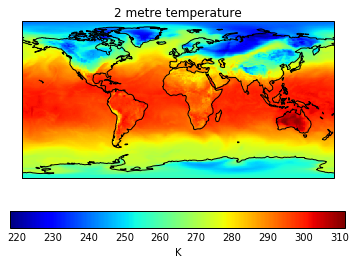

In [6]:
qplt.pcolormesh(temp[0])
plt.gca().coastlines()

#### A NOTE ON COLOURBARS
Please please please don't use the default rainbow colour scale. It's being phased out because it deforms the data. See [here](http://www.climate-lab-book.ac.uk/2016/why-rainbow-colour-scales-can-be-misleading/) for more. Compare how different rainbow (above) looks to the new better Viridis (below). What different (erroneous) conclusions, might you make from the top plot, that you would from the bottom?

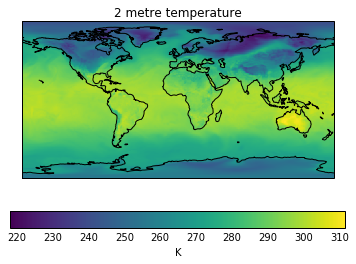

In [7]:
qplt.pcolormesh(temp[0], cmap='viridis')
plt.gca().coastlines()

### TASK:
Can you edit and rerun the cells above to
1. plot the data from a different time?
1. google what other colour maps Matplotlib has, and try them out?
1. google how to add a title to the plot?

## Interactive Temperature plot
Using `cube_browser` i.e. `cb` we can make a slider to look at different times. Again, you can read about this [here](http://scitools.github.io/cube_browser/)

In [8]:
import cube_browser as cb

Autosave disabled


In [9]:
uklatlims = (30.0, 60.0)
uklonlims = (-50.0, 5.0)
uktemp = temp.intersection(latitude=uklatlims, longitude=uklonlims)

<IPython.core.display.Javascript object>


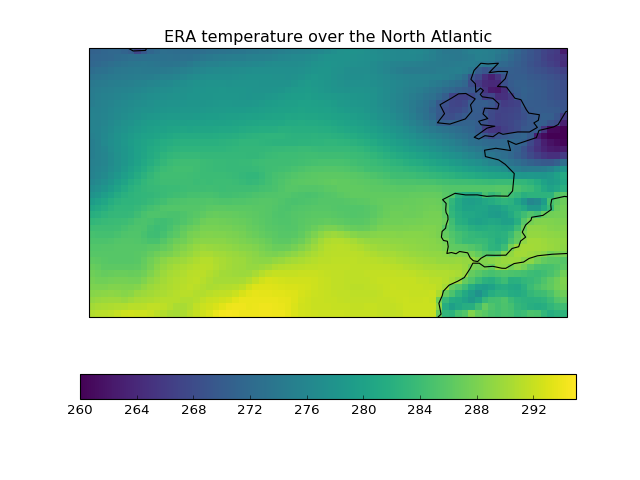

In [27]:
plt.figure()

ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.coastlines()

plot = cb.Pcolormesh(uktemp, ax, cmap='viridis', vmin=260, vmax=295)
cb.Browser([plot]).display()
plt.title("ERA temperature over the North Atlantic")

### TASK:
Can you edit the plots above to
1. change the plot so it shows the USA?
1. change the projection to North Polar Stereo (see [Cartopy](http://scitools.org.uk/cartopy/))?

## Two plots, one slider
We can also have side by side plots that are linked together. In this example we'll load some air pressure and precip data to look at side by side

In [11]:
ukpress = iris.load("/data/incoming/era-interim-surface-pressure-2000-2010.nc",
                         callback=history_cb).concatenate_cube().intersection(latitude=uklatlims, longitude=uklonlims)
ukprecip = iris.load("/data/incoming/era-interim-total-precip-2000-2010.nc",
                         callback=history_cb).concatenate_cube()[:29224].intersection(latitude=uklatlims, longitude=uklonlims)

<IPython.core.display.Javascript object>


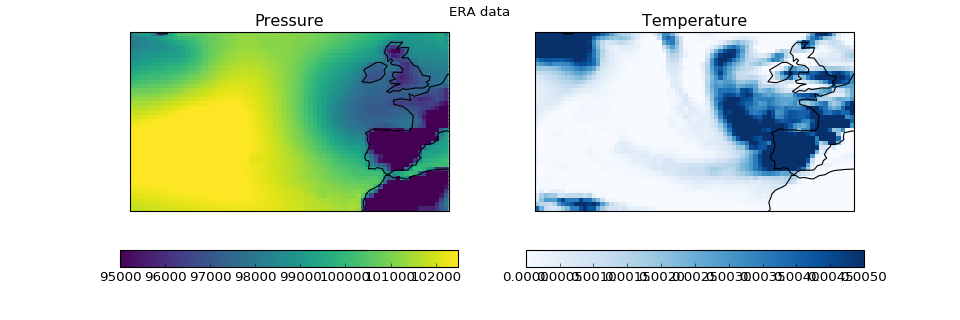

In [22]:
plt.figure(figsize=(12, 4), num=None)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines()
temp_plot = cb.Pcolormesh(ukpress, ax1, cmap='viridis', vmin=95000, vmax=102500)
plt.title("Pressure")

ax2 = plt.subplot(122, projection=ccrs.PlateCarree())
ax2.coastlines()
press_plot = cb.Pcolormesh(ukprecip, ax2, cmap='Blues', vmin=0.0, vmax=0.005)
plt.title("Temperature")

plt.suptitle("ERA data")

cb.Browser([temp_plot, press_plot]).display()

### TASK
Can you make the main title a bigger fontsize?

## Other Stuff

You can even embed videos

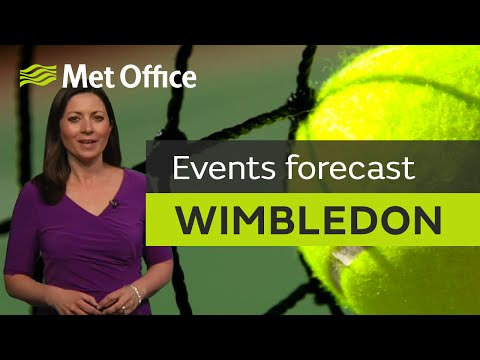

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo("fEyqBop3p14")

### Dashboards
If you click this button ![](./button.png) up at the top of this page, you can turn this whole Notebook into and interactive document!

### TASK
Click the button to the left of this with four squares and start creating your own dashboard